In [1]:
%matplotlib inline
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
from os.path import join, basename, splitext

In [2]:
# Directions per http://web.mit.edu/fsl_v5.0.8/fsl/doc/wiki/POSSUM(2f)UserGuide.html
rot_dirs = ['Pitch', 'Roll', 'Yaw']
trans_dirs = ['X', 'Y', 'Z']
colors = ['r', 'b', 'g']

data_dir = '/scratch/PSB6351_2017/students/salo/data/'
out_dir = '/scratch/PSB6351_2017/students/salo/week5/hw02/'

plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
# Get ylims
subjects = [f for f in glob(join(data_dir, '*'))]
t_min = 0.
t_max = 0.
r_min = 0.
r_max = 0.
for s in subjects:
    motpar_files = sorted([f for f in glob(join(s, 'motion/*.par'))])
    for f in motpar_files:
        dat = np.loadtxt(f)
        r, t = dat[:, :3], dat[:, 3:]
        r_min = np.min([r_min, np.min(r)])
        r_max = np.max([r_max, np.max(r)])
        t_min = np.min([t_min, np.min(t)])
        t_max = np.max([t_max, np.max(t)])
r_min = np.floor(r_min * 10.) / 10.
r_max = np.ceil(r_max * 10.) / 10.
t_min = np.floor(t_min * 100.) / 100.
t_max = np.ceil(t_max * 100.) / 100.

sub-01
sub-03
sub-05
sub-10
sub-06
sub-09
sub-02
sub-13
sub-04
sub-07
sub-12


/home/data/nbc/ns-vs-bm/ns-vs-bm/env/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


sub-14
sub-11
sub-15


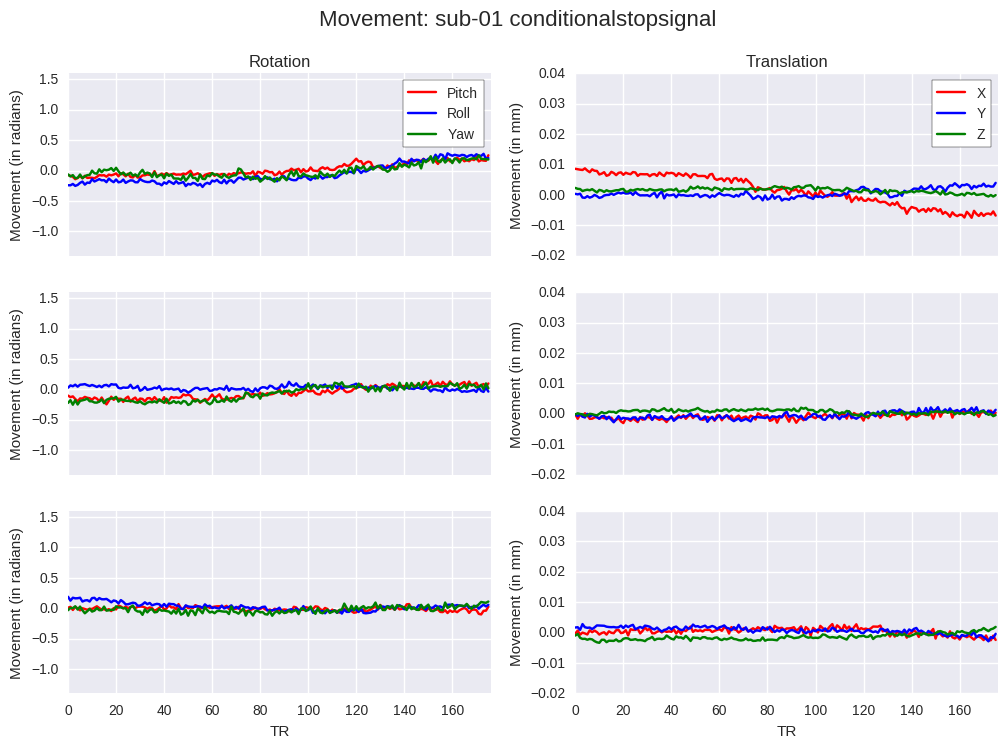

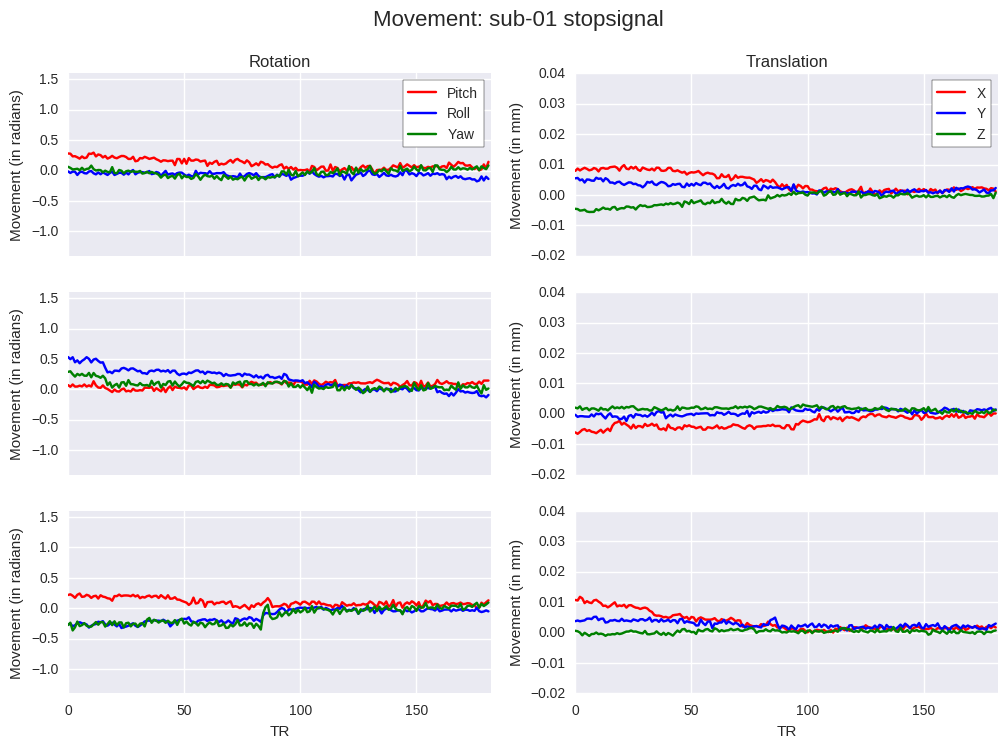

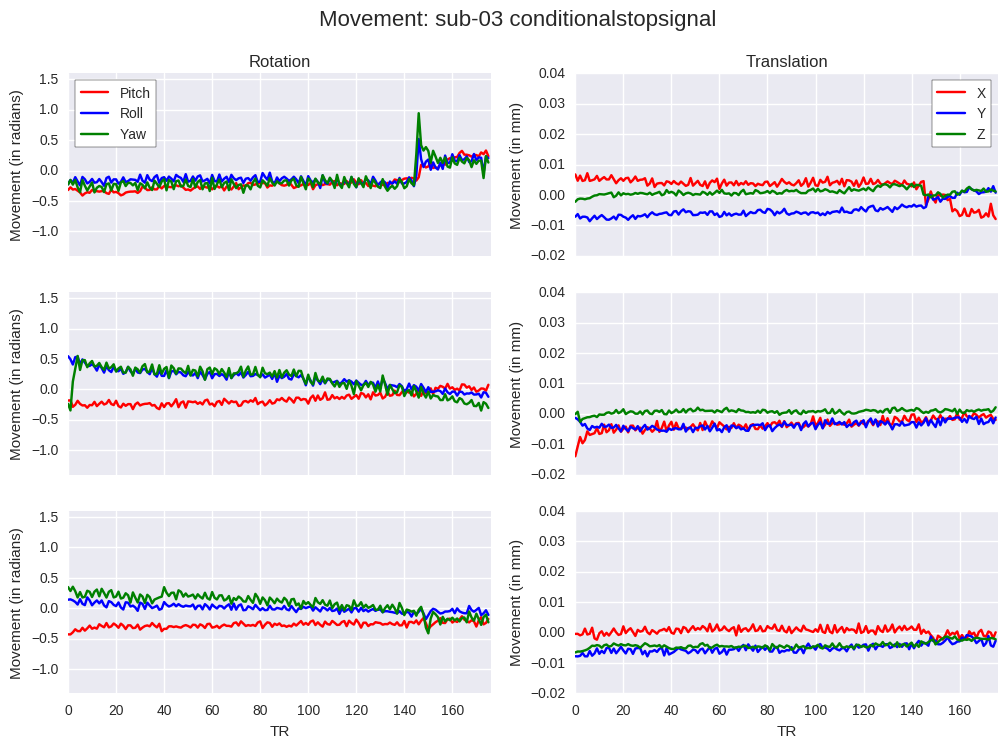

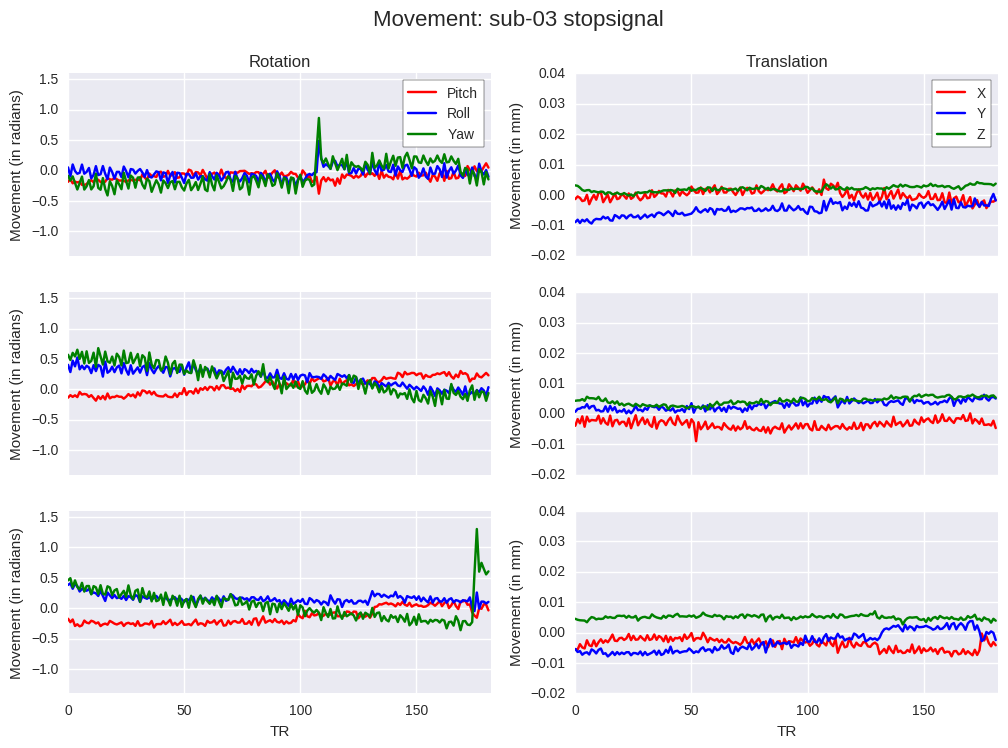

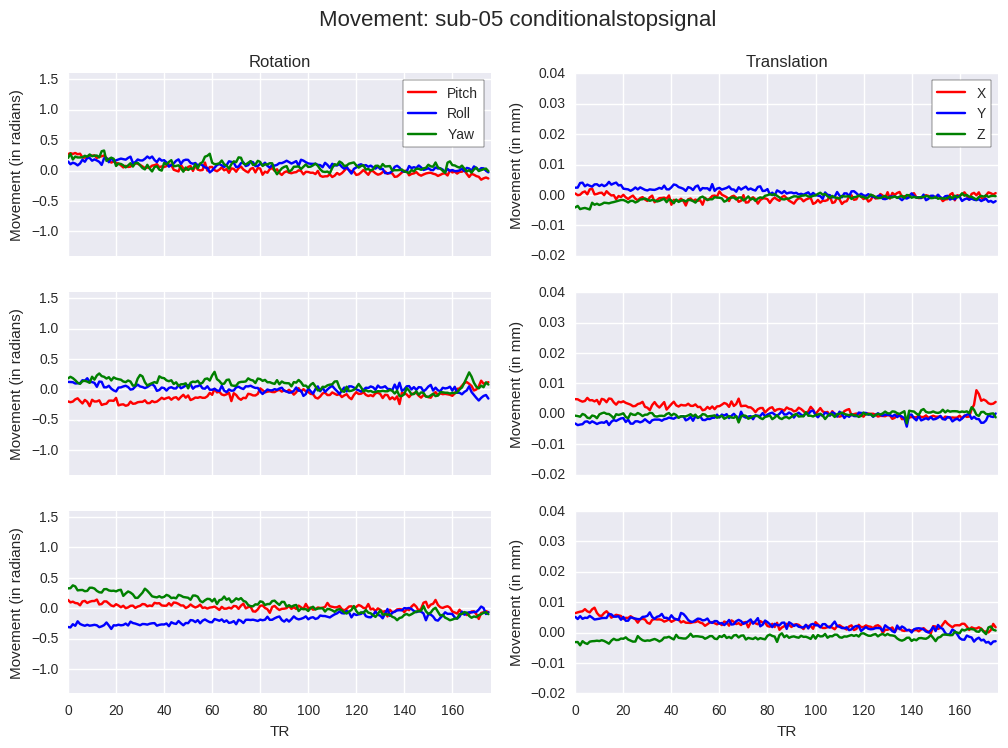

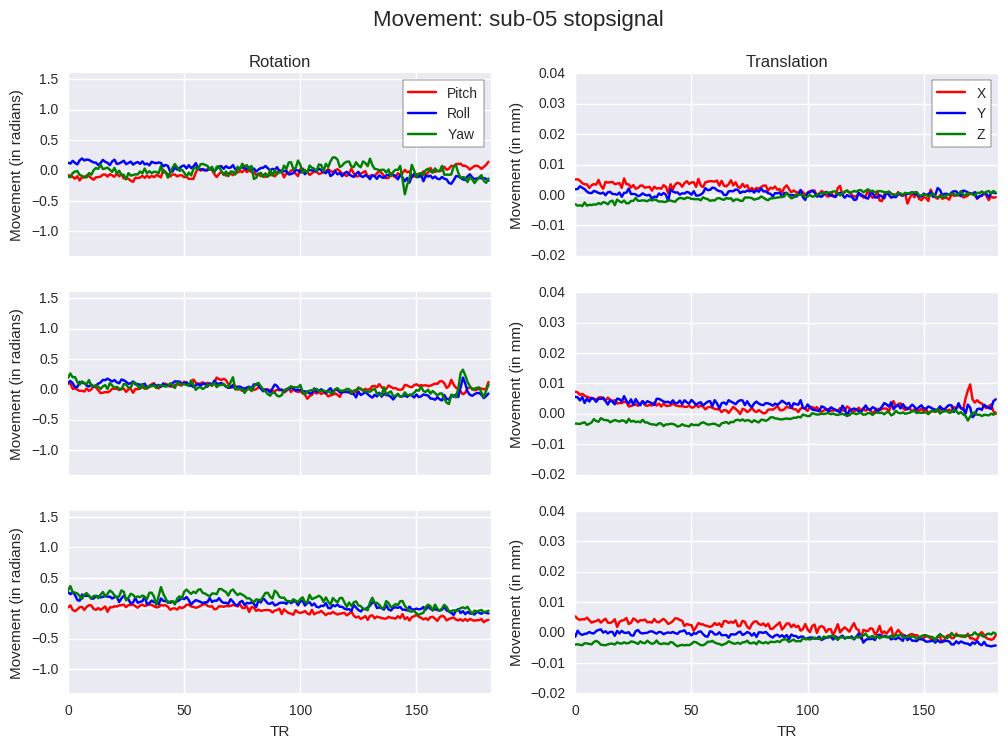

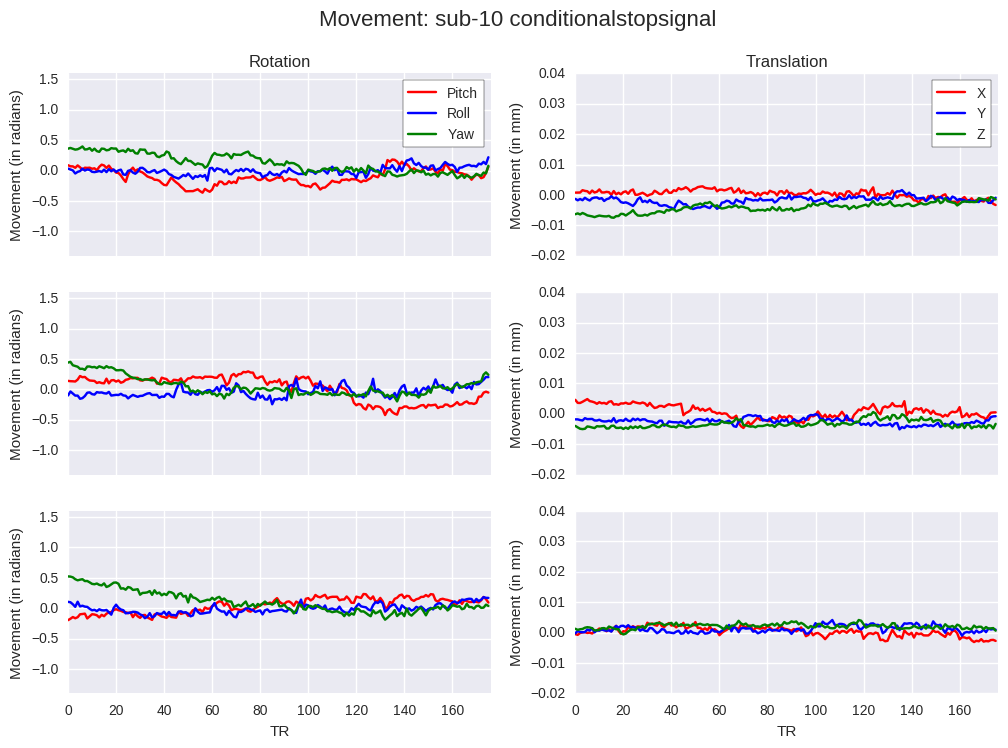

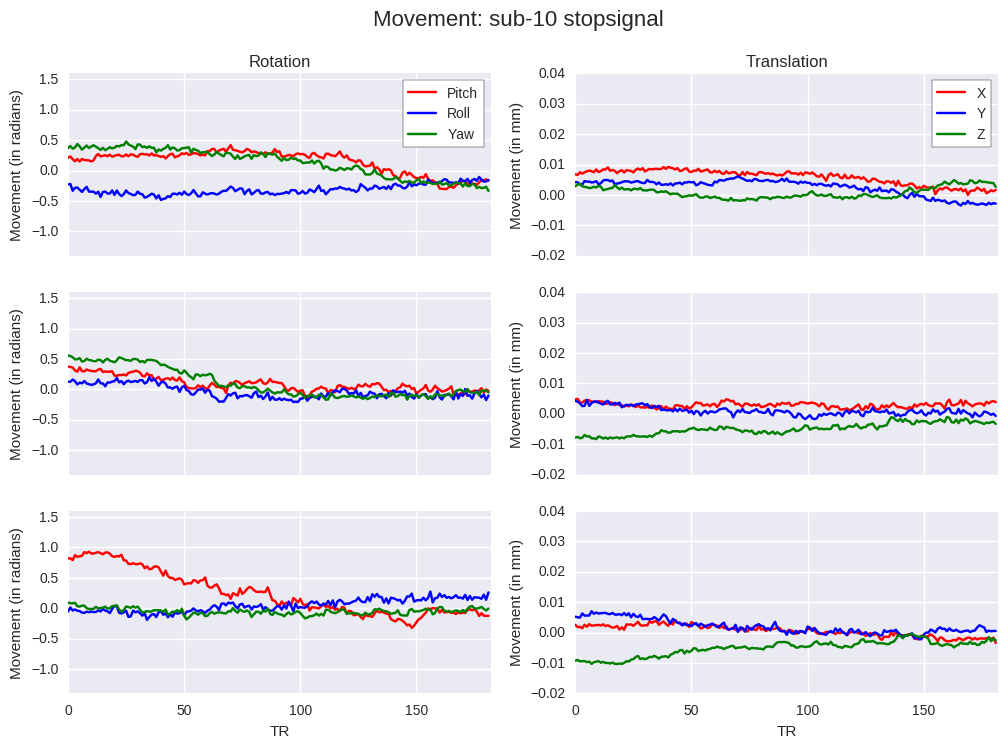

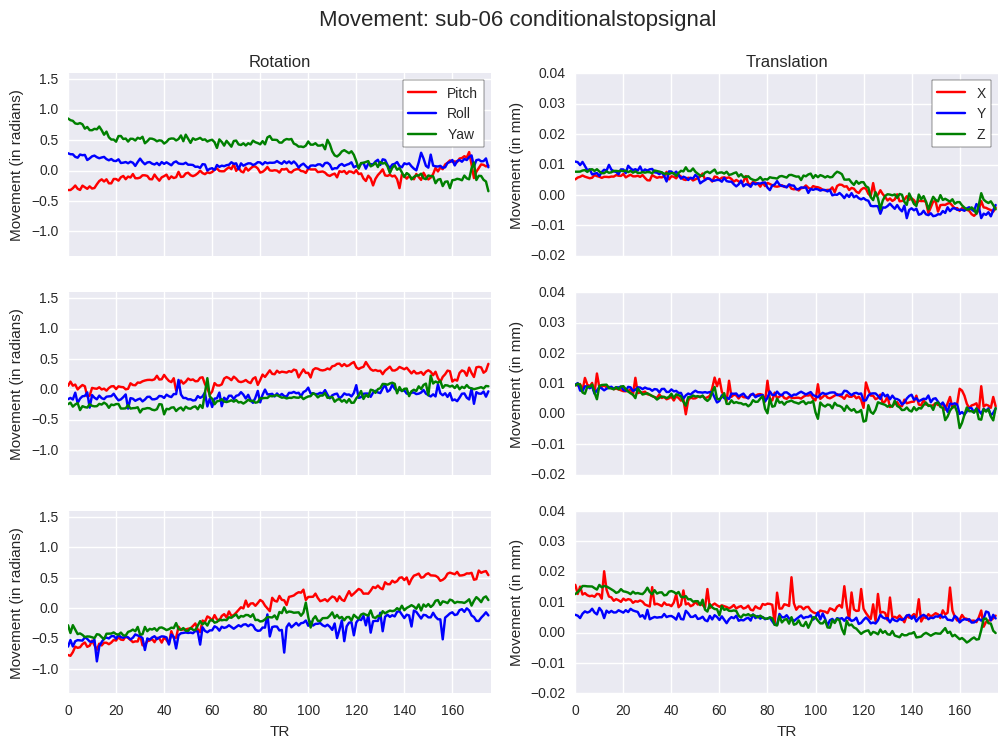

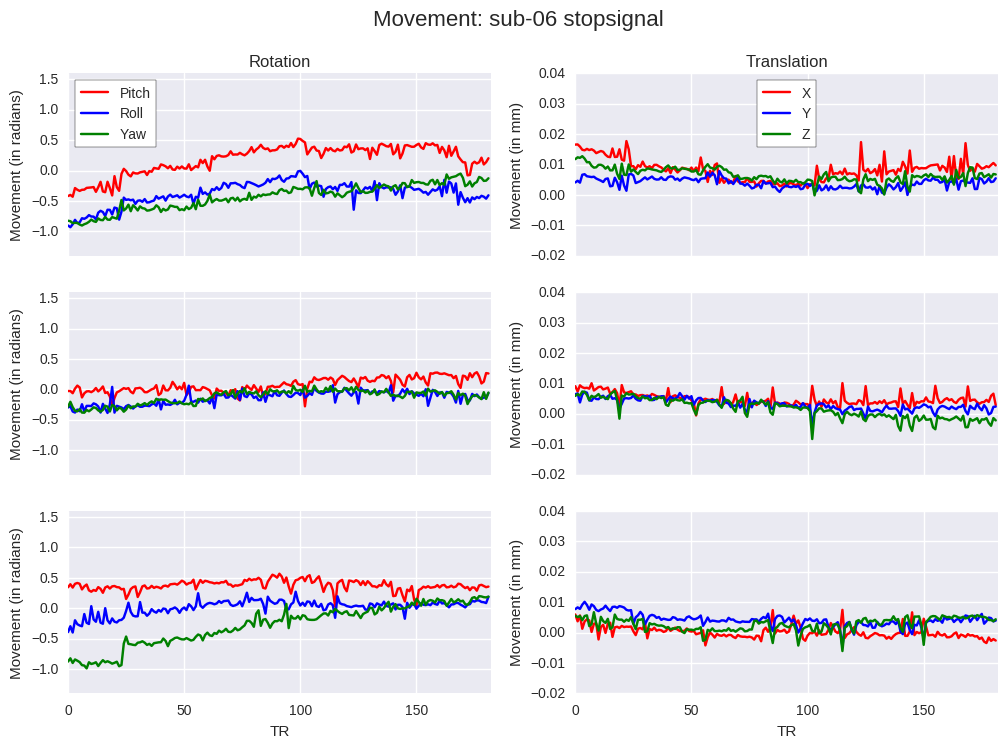

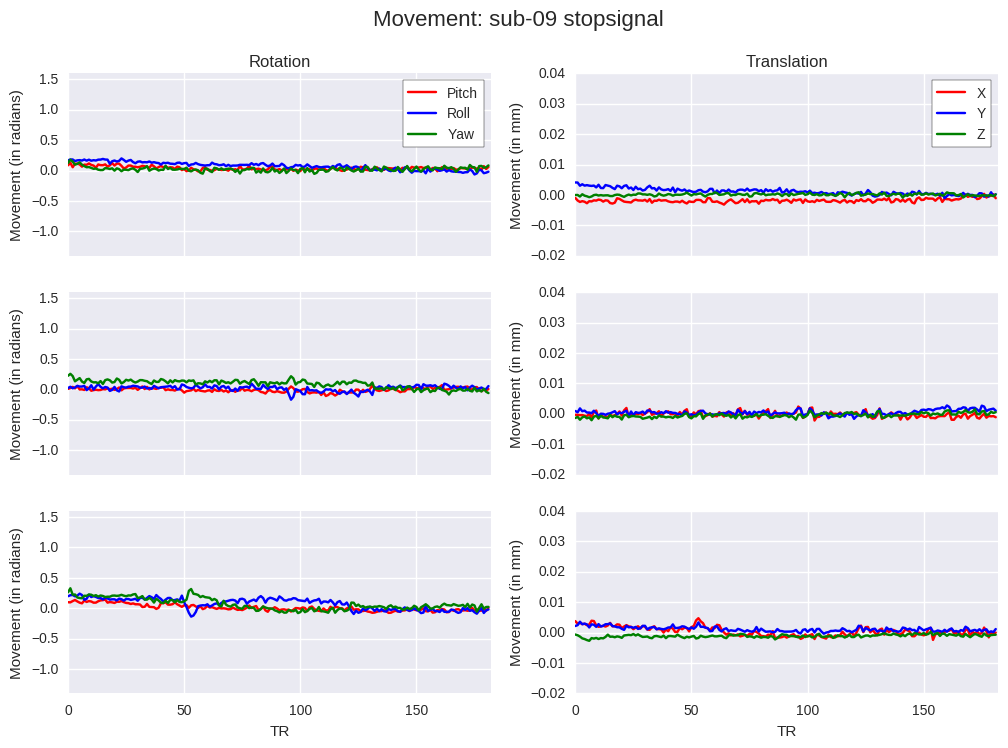

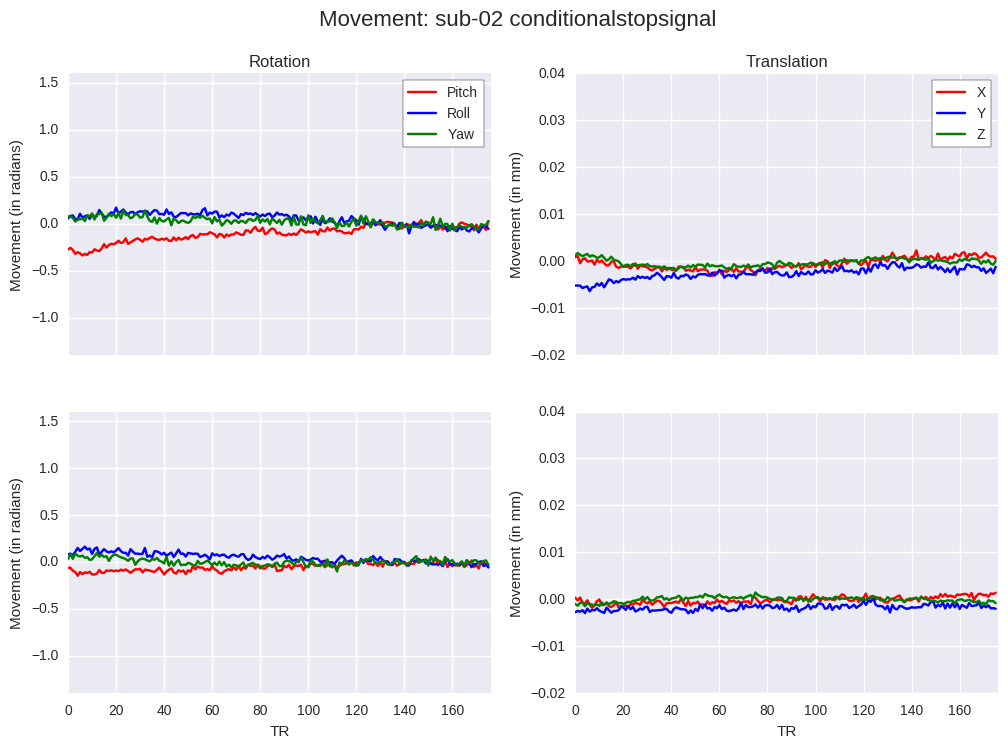

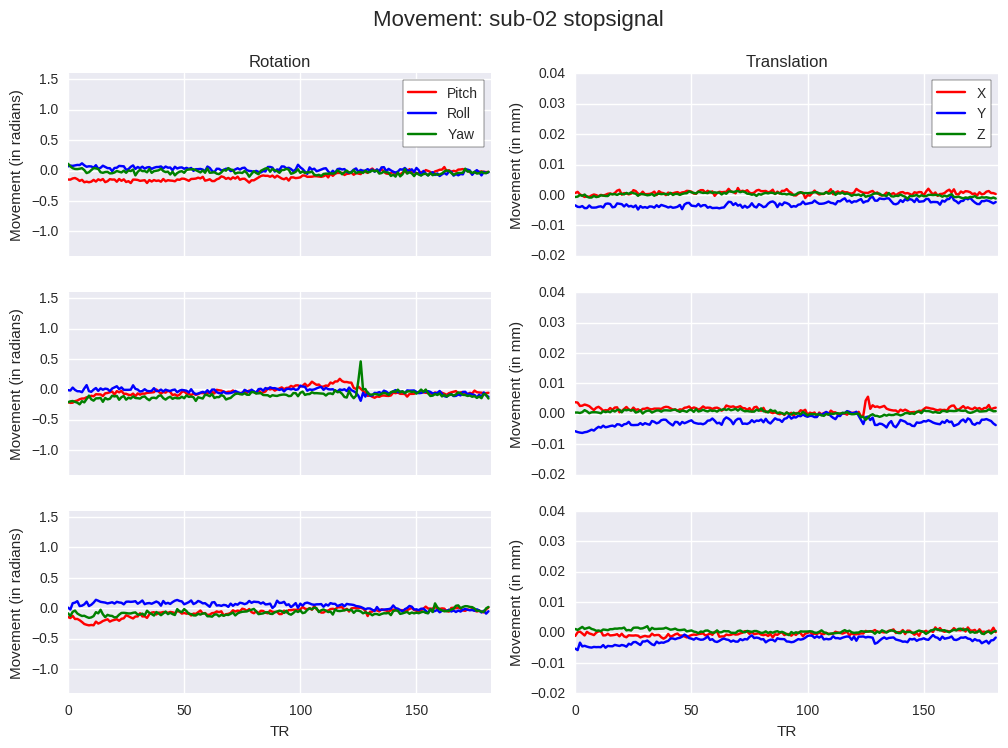

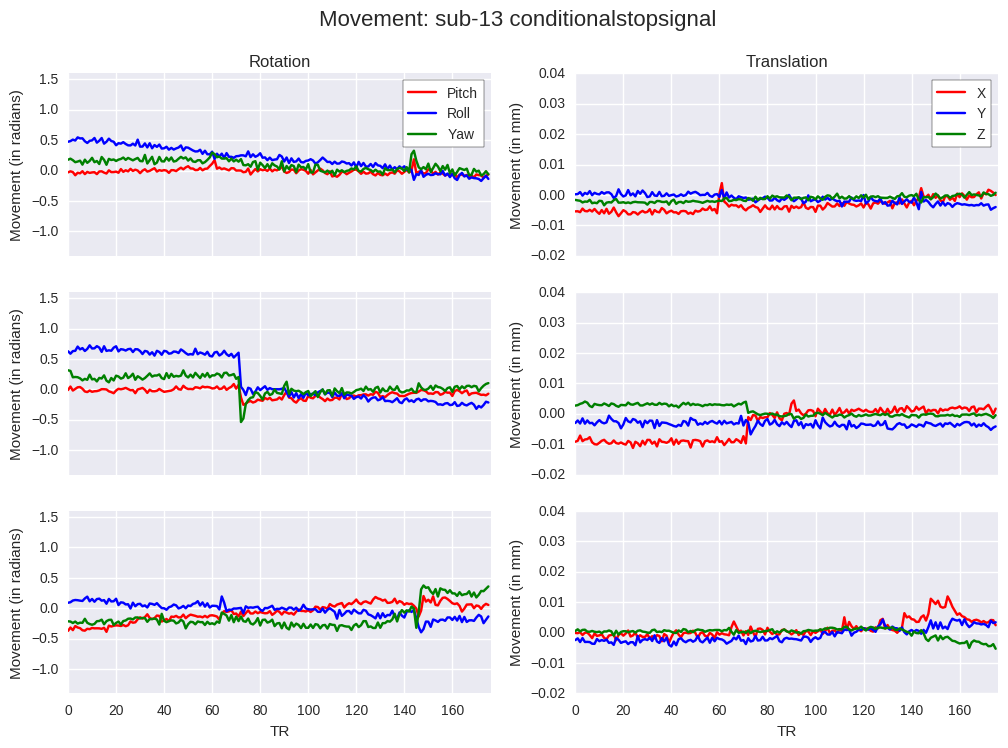

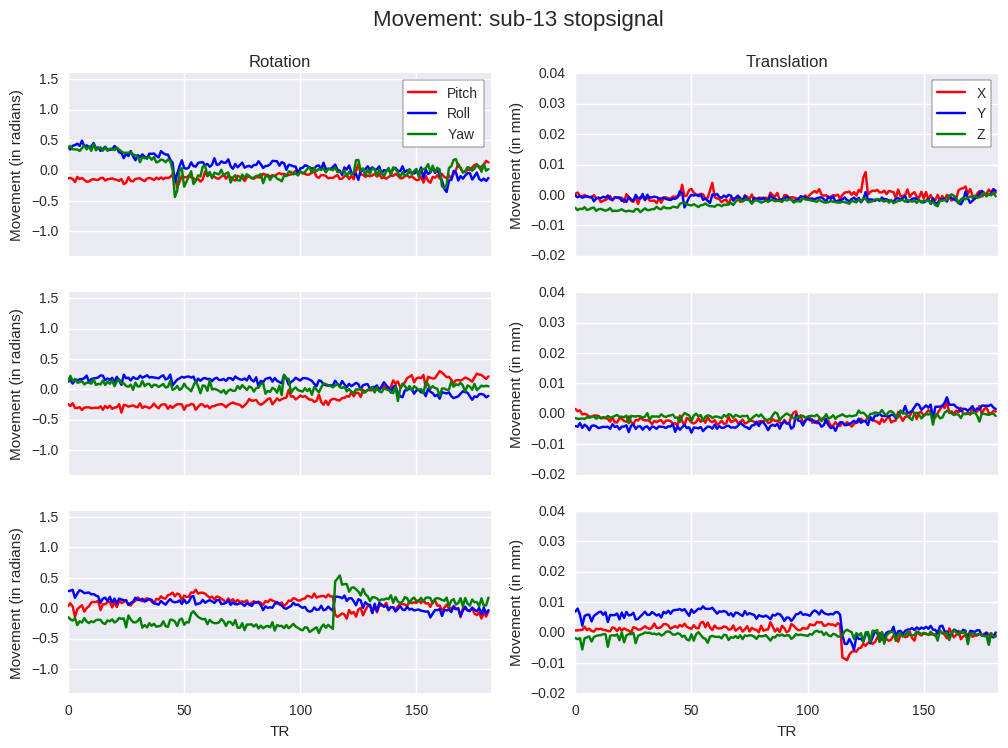

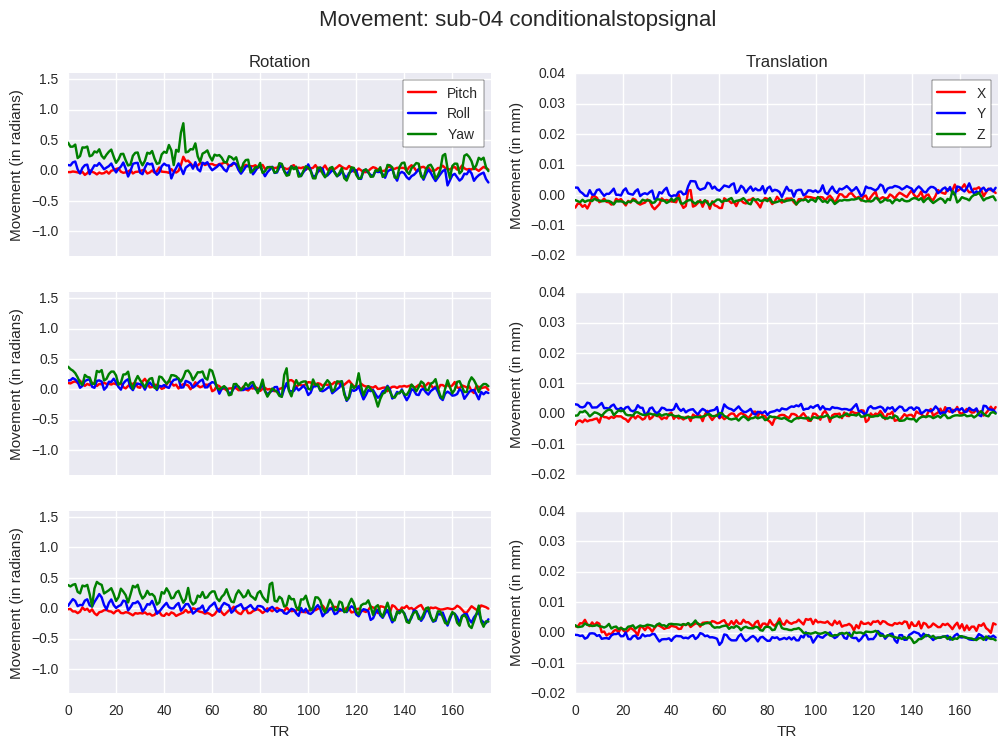

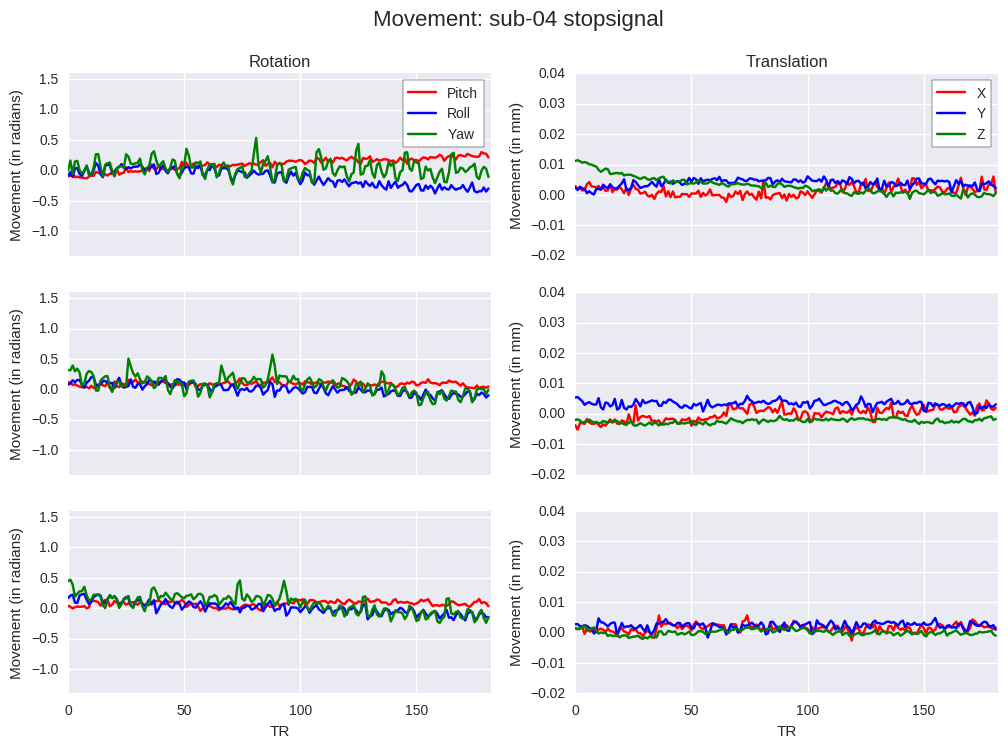

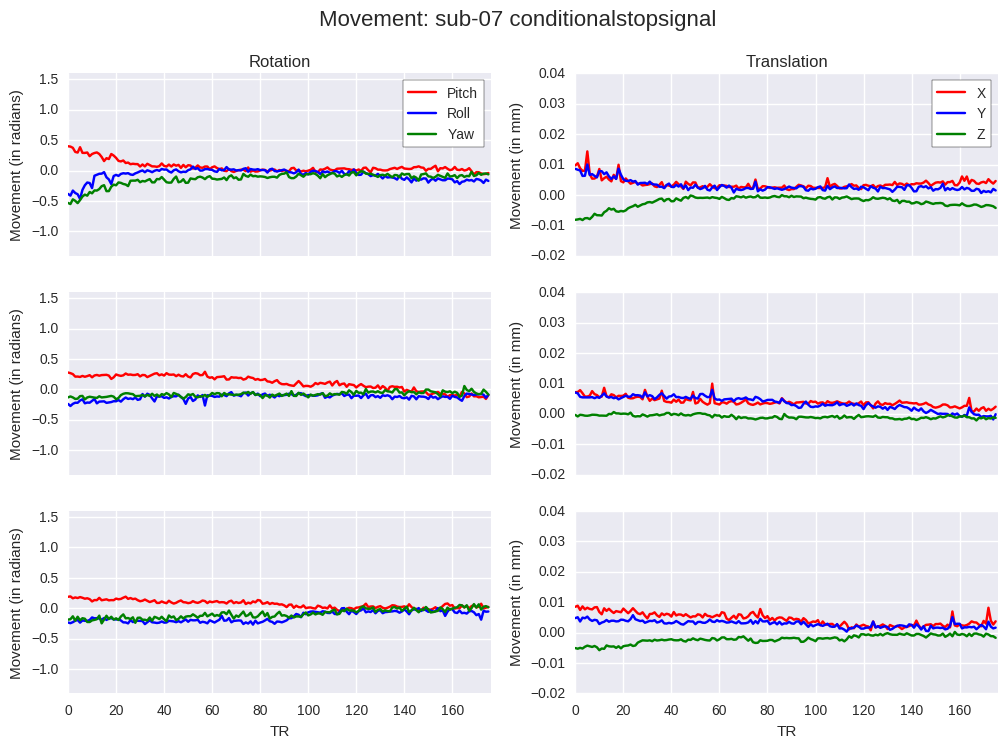

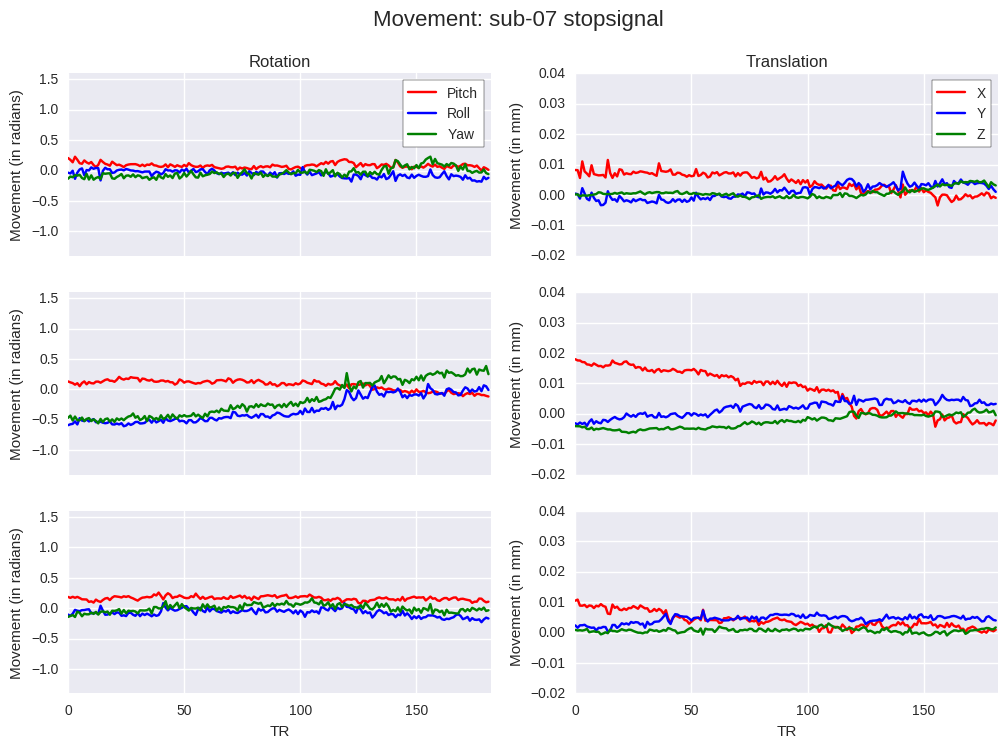

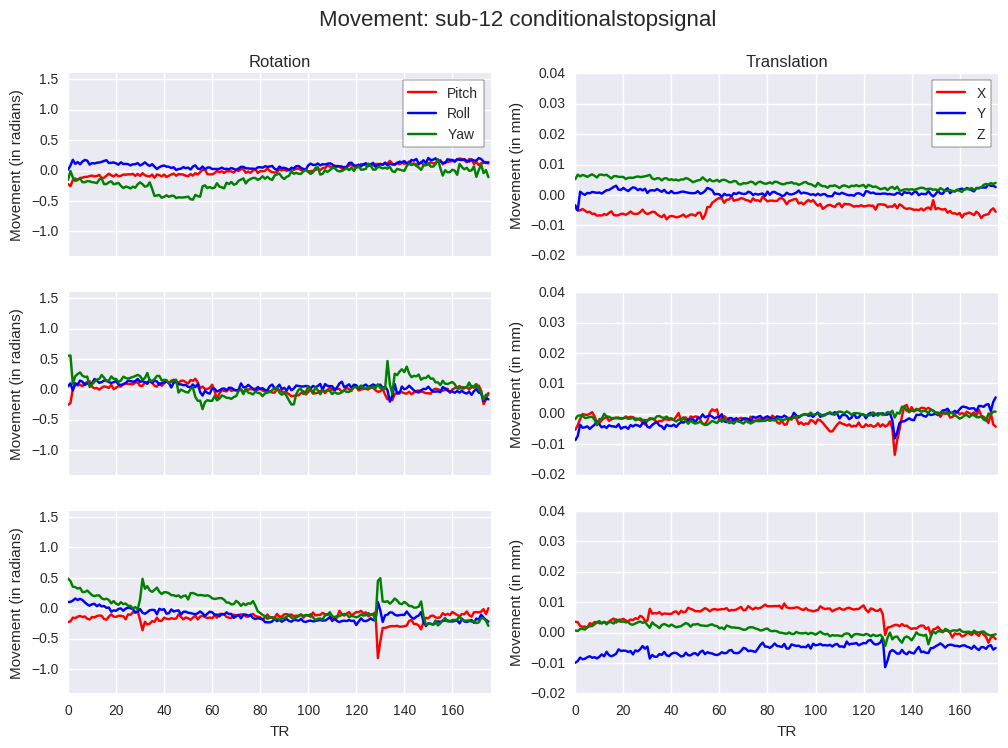

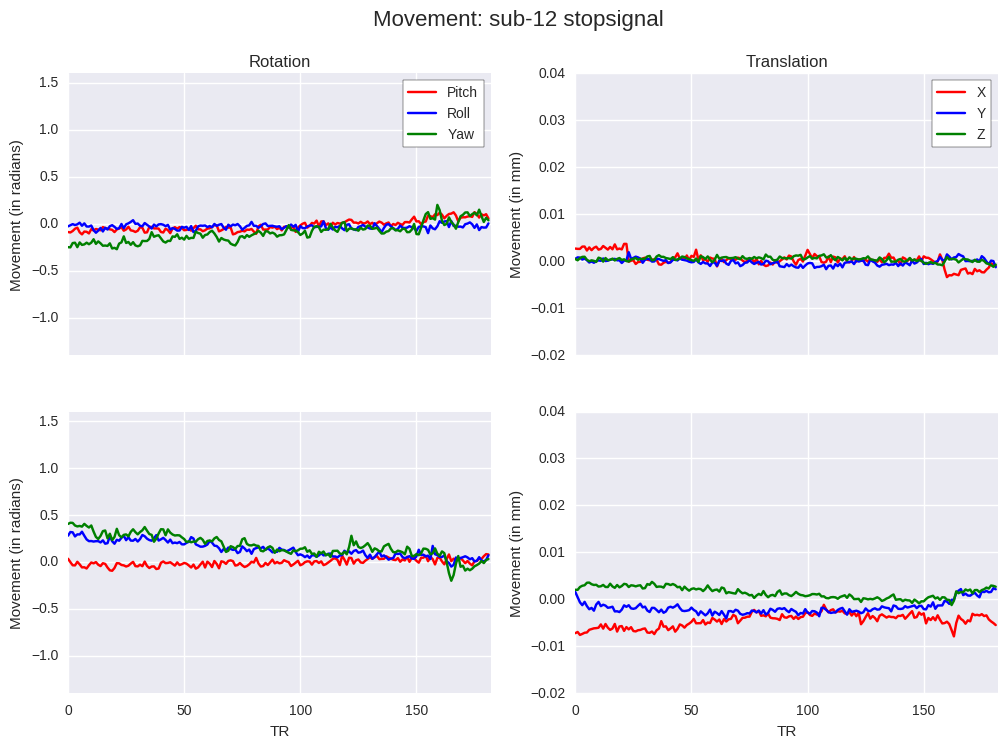

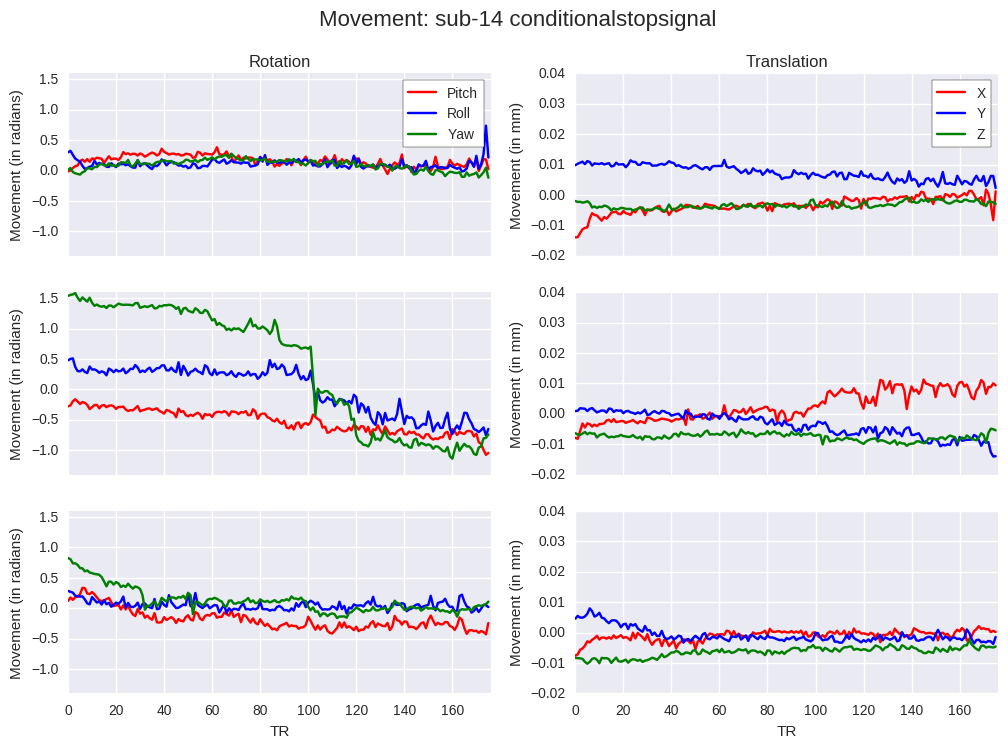

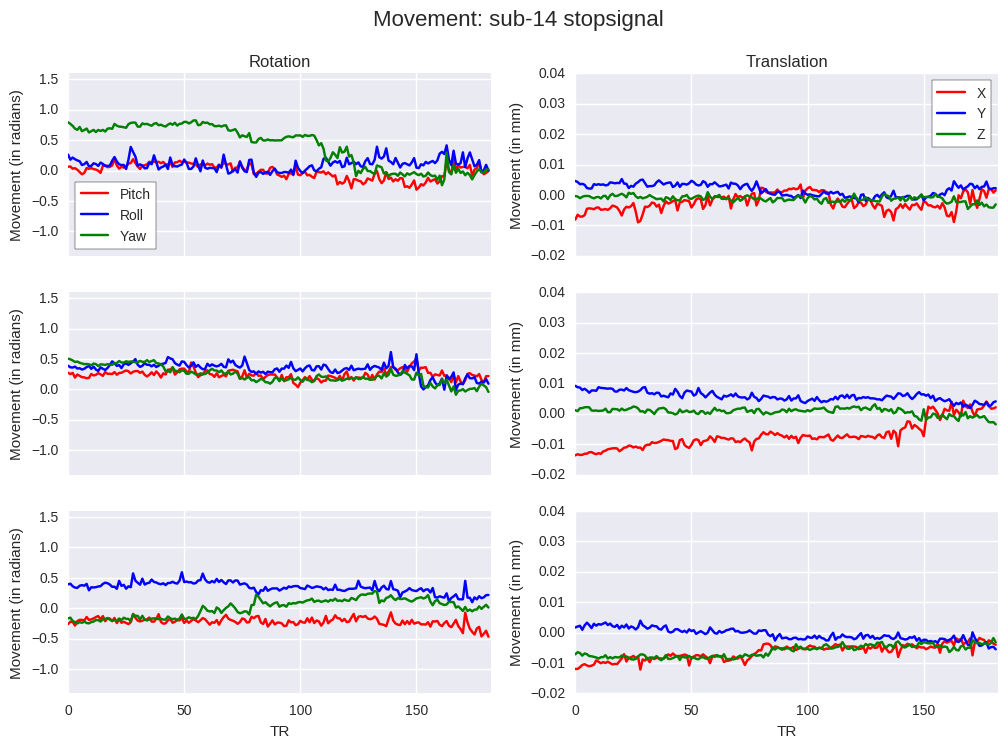

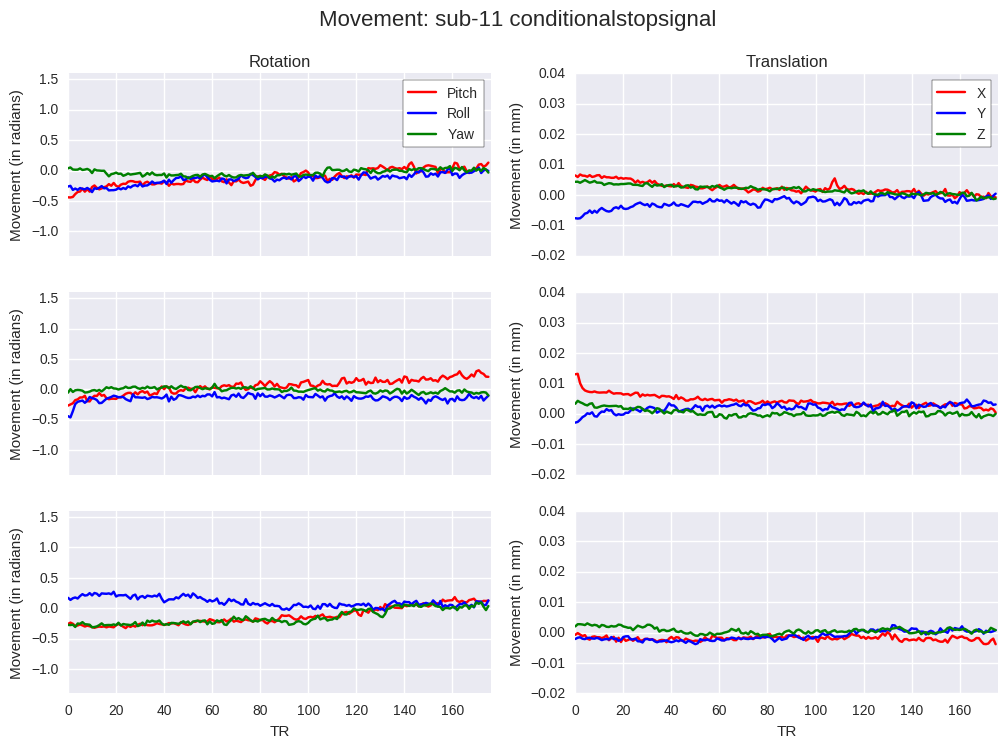

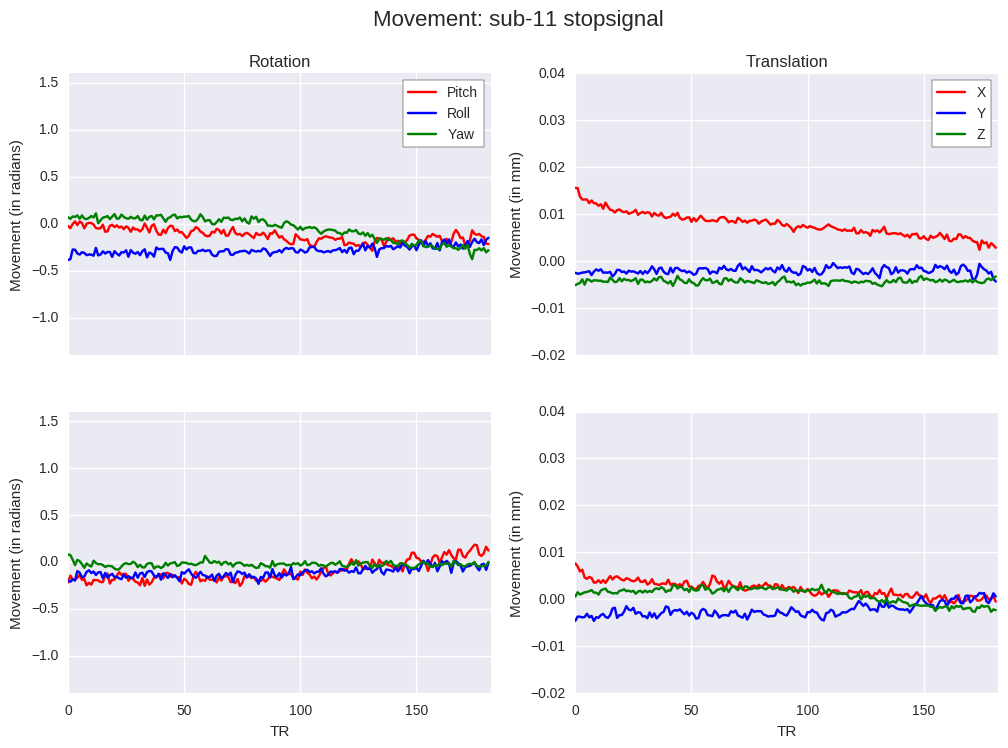

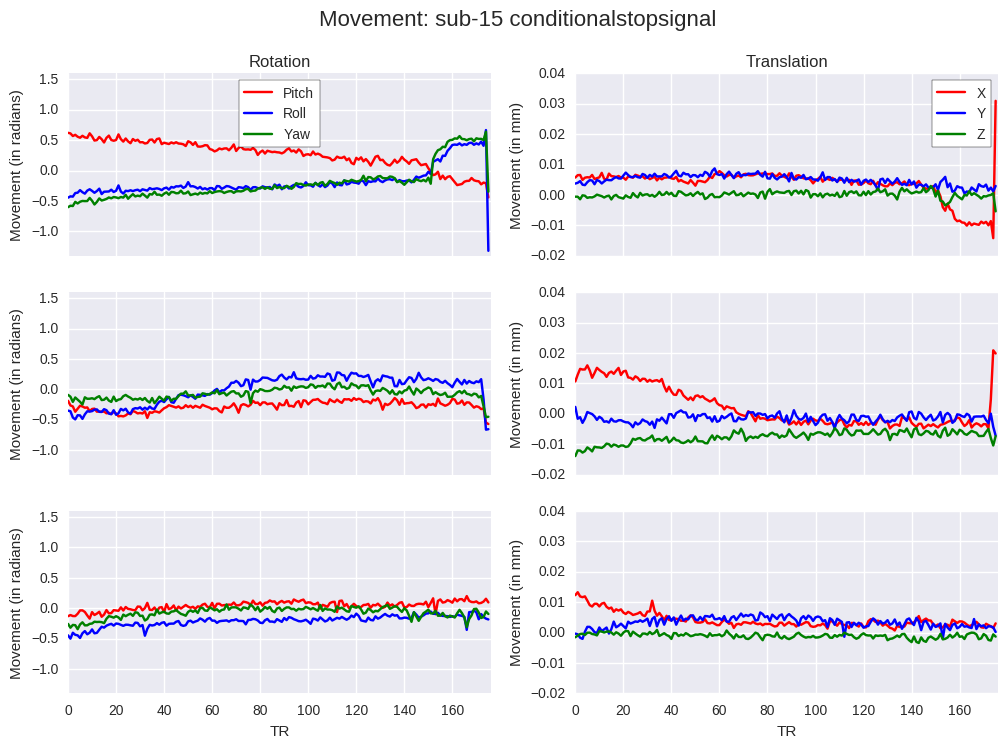

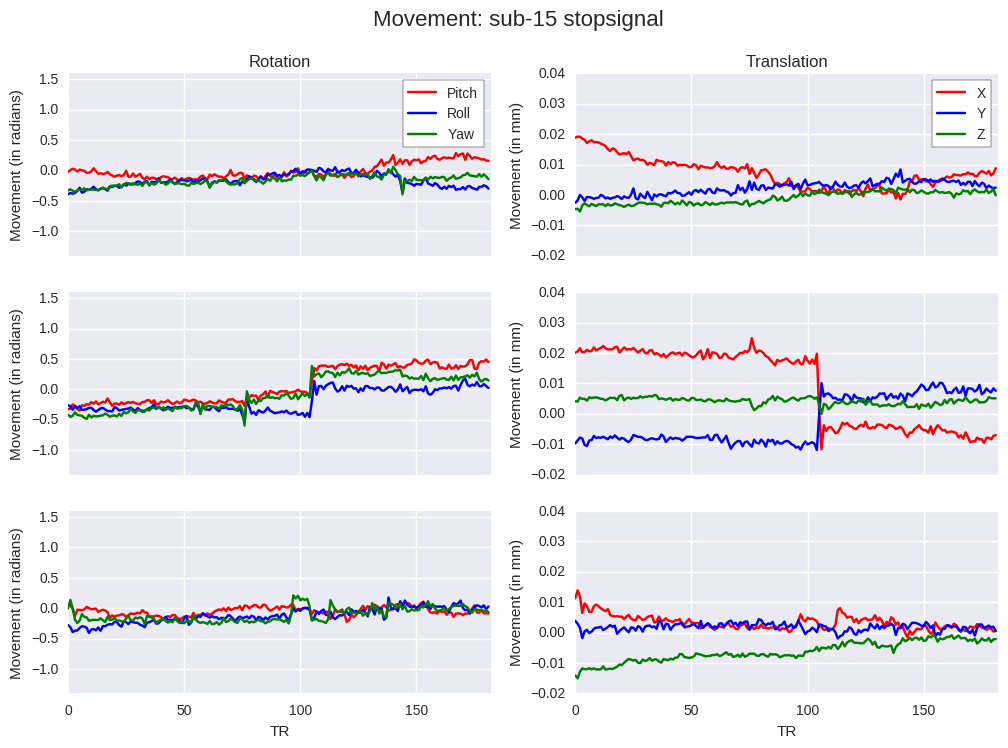

In [4]:
subjects = [basename(f) for f in glob(join(data_dir, '*'))]
for s in subjects:
    print(s)
    
    motpar_files = sorted([basename(f) for f in glob(join(data_dir, s, 'motion/*.par'))])
    tasks = sorted(list(set([re.search('task-(.*)_run', f).group(1) for f in motpar_files])))
    for t in tasks:
        rel_files = sorted([f for f in motpar_files if 'task-{0}_run'.format(t) in f])
        n_runs = len(rel_files)
        fig, axarr = plt.subplots(n_runs, 2)
        fig.suptitle('Movement: {0} {1}'.format(s, t), fontsize=16)

        for run in range(n_runs):
            run_name = re.search('(run-[0-9][0-9])', rel_files[run]).group(0)
            dat = np.loadtxt(join(data_dir, s, 'motion', rel_files[run]))
            rot, trans = dat[:, :3], dat[:, 3:]

            for i, rot_dir in enumerate(rot_dirs):
                axarr[run, 0].plot(range(dat.shape[0]), rot[:, i], c=colors[i], label=rot_dir)

            axarr[run, 0].set_ylim((r_min, r_max))
            axarr[run, 0].set_xlim((0, dat.shape[0]))
            axarr[run, 0].set_ylabel('Movement (in radians)')

            for i, trans_dir in enumerate(trans_dirs):
                axarr[run, 1].plot(range(dat.shape[0]), trans[:, i], c=colors[i], label=trans_dir)

            axarr[run, 1].set_ylabel('Movement (in mm)')
            if run != n_runs-1:
                axarr[run, 0].set_xticklabels([])
                axarr[run, 1].set_xticklabels([])
            axarr[run, 1].set_ylim((t_min, t_max))
            axarr[run, 1].set_xlim((0, dat.shape[0]))
        
        axarr[0, 0].set_title('Rotation')
        axarr[0, 1].set_title('Translation')
        axarr[-1, 0].set_xlabel('TR')
        axarr[-1, 1].set_xlabel('TR')

        legend = axarr[0, 0].legend(frameon=True, loc='best')
        frame = legend.get_frame()
        frame.set_facecolor('white')
        frame.set_edgecolor('black')

        legend = axarr[0, 1].legend(frameon=True, loc='best')
        frame = legend.get_frame()
        frame.set_facecolor('white')
        frame.set_edgecolor('black')
        
        fig.savefig(join(out_dir, '{0}-{1}.png'.format(s, t)), dpi=400)